# Tensorflow on Iris dataset

Let's replicate the process used in the intro notebook but on the Iris dataset (as opposed to one we just made up)
    * Intro notebook does linear regression
    * Iris classification problem requires logistic regression - We will have to change our loss function to
      account for this

In [25]:
import tensorflow as tf
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from src.makevis import *
%matplotlib inline
iris = load_iris()

In [2]:
iris_man = Manipulation(iris)
name_dict = iris_man.make_label_name_dict()
full_df = iris_man.create_df()
full_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
5,5.4,3.9,1.7,0.4,0,setosa
6,4.6,3.4,1.4,0.3,0,setosa
7,5.0,3.4,1.5,0.2,0,setosa
8,4.4,2.9,1.4,0.2,0,setosa
9,4.9,3.1,1.5,0.1,0,setosa


In [3]:
train_df, test_df = iris_man.create_df(split= True)
test_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species name
0,7.9,3.8,6.4,2.0,2,virginica
1,6.4,2.9,4.3,1.3,1,versicolor
2,4.8,3.0,1.4,0.1,0,setosa
3,6.5,3.0,5.8,2.2,2,virginica
4,4.4,3.0,1.3,0.2,0,setosa
5,7.2,3.2,6.0,1.8,2,virginica
6,6.4,2.7,5.3,1.9,2,virginica
7,5.5,2.4,3.8,1.1,1,versicolor
8,6.9,3.2,5.7,2.3,2,virginica
9,6.7,3.0,5.0,1.7,1,versicolor


In [4]:
num_train, num_test, num_outputs = iris_man.count_train_test_data(train_df, test_df)
print ('Training size: {}'.format(num_train))
print ('Testing size: {}'.format(num_test))
print ('Num Classes: {}'.format(num_outputs))

Training size: 112
Testing size: 38
Num Classes: 3


In [5]:
y_hot_train, y_hot_test = iris_man.one_hot_encode(train_df, num_train, test_df, num_test, num_outputs)
y_hot_test[:10]

array([[ 0.,  0.,  1.],
       [ 0.,  1.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  1.,  0.]])

# Get Train Values from df

In [6]:
X_train, y_train = iris_man.get_Xy_vals(train_df)
X_test, y_test = iris_man.get_Xy_vals(test_df)

## 1) Create Placeholders for X, y

In [7]:
num_features = train_df.shape[1] - 2
x_tf = tf.placeholder(tf.float32, shape=[None, num_features])
y_tf = tf.placeholder(tf.float32, shape=[None, num_outputs])
print('Number of features: {}'.format(num_features))

Number of features: 4


## 2) Initialize input variables to hidden layer

In [8]:
# Weights. There are 3 output classes, and one weight per (feature, output class)
# combination
W = tf.Variable(tf.zeros([num_features, num_outputs]))

# Biases. This is line an intercept term in a linear regression. There is one
# per output class
b = tf.Variable(tf.zeros([num_outputs]))

# Output layer, probabilities of each class
y_hat = tf.nn.softmax(tf.matmul(x_tf, W) + b)

## 3) Specify Loss Function

In [9]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_tf * tf.log(y_hat), reduction_indices= [1]))#log loss

## 4) Create Optimizer to Minimize Loss

In [10]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

## 5) Create Session

In [11]:
sess = tf.InteractiveSession()
init = tf.global_variables_initializer()
sess.run(init)

## 6) Evaluate Global Variable Initializer - Training

In [12]:
for i in range(1000):
    sess.run(train_step, feed_dict= {x_tf: X_train.reshape(-1, num_features), y_tf: y_hot_train.reshape(-1, num_outputs)})
#     if i % 10 == 0:
#         print ("train step: {}".format(i))
#         print("W: {}".format(sess.run(W)))
#         print("b: {}".format(sess.run(b)))

# 7) Obtain Predictions Using Feed Dict

In [13]:
y_hat.shape

TensorShape([Dimension(None), Dimension(3)])

In [14]:
y_pred = y_hat.eval(feed_dict= {x_tf: X_test.reshape(-1, num_features), y_tf: y_hot_test.reshape(-1, num_outputs)})

In [15]:
y_pred[:5, :]

array([[  3.42615436e-07,   4.58261043e-01,   5.41738570e-01],
       [  3.50202259e-04,   9.99601543e-01,   4.83122167e-05],
       [  9.97991920e-01,   2.00808072e-03,   4.62092920e-19],
       [  2.46747206e-11,   6.89673689e-05,   9.99930978e-01],
       [  9.98637855e-01,   1.36216520e-03,   3.64379967e-18]], dtype=float32)

In [16]:
pred_labels = np.argmax(y_pred, 1)
pred_labels

array([2, 1, 0, 2, 0, 2, 2, 1, 2, 1, 1, 0, 1, 0, 1, 0, 0, 2, 1, 2, 1, 0, 0,
       1, 1, 1, 2, 1, 1, 1, 2, 0, 1, 2, 0, 1, 0, 2])

In [17]:
num_correct_predictions = np.sum([pred_labels == y_test])
test_accuracy = num_correct_predictions/float(len(pred_labels))
print("Test Error Accuracy: {:0.3f}".format(test_accuracy))

Test Error Accuracy: 0.974


In [18]:
num_correct_predictions

37

# 8) Model Evaluation: threshholds and ROC curves

In [19]:
c = Curves(y_pred, y_test, iris)
setosa_df = c.calculate_threshold_values(0)
setosa_df.head()

,prob,y,tn,fn,fp,tp,fpr,tpr,precision,recall
0,2.467472e-11,2,1,0,26,11,0.962963,1.0,0.297297,1.0
1,1.053839e-10,2,2,0,25,11,0.925926,1.0,0.305556,1.0
2,5.786177e-10,2,3,0,24,11,0.888889,1.0,0.314286,1.0
3,1.724445e-09,2,4,0,23,11,0.851852,1.0,0.323529,1.0
4,2.537293e-09,2,5,0,22,11,0.814815,1.0,0.333333,1.0


"\nAdd the wikipedia plot but put the mislabeled points in the color black \n\nFor MNIST: Start small, start easy! \nFirst project\n1) Get the MNIST data \n2) Filter out all but the numbers 9 and 2 \n3) Build a 2 v 9 classifier (I strongly recommend only keeping a subset of the training data, you don't need more than a few MBs)\n3a) Visualize the layers in your net, ideal while it's training \n3b) Investigate something equivalent to the training stats curve \n3c) Invetsigate using tensorboard while your model is training \n4) Once you have a good 2 v 9 classifier build out a 3 way classifier (0 v 4 v 7) (for this one try not to prefilter the data, instead read from the fukll dataset \n5) Do the full 10 digit classifier \n\nLinks:\nhttp://cs.stanford.edu/people/karpathy/convnetjs/\n\n"

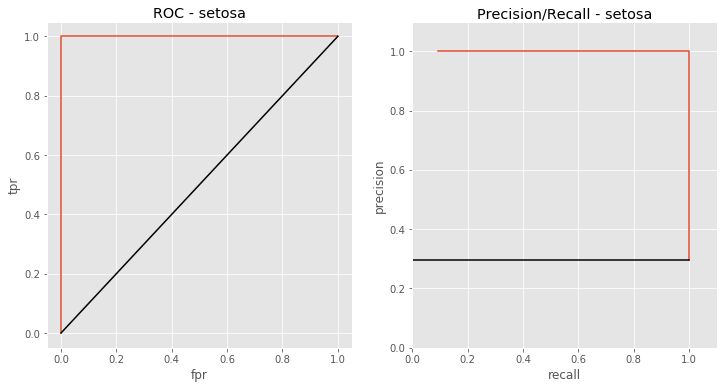

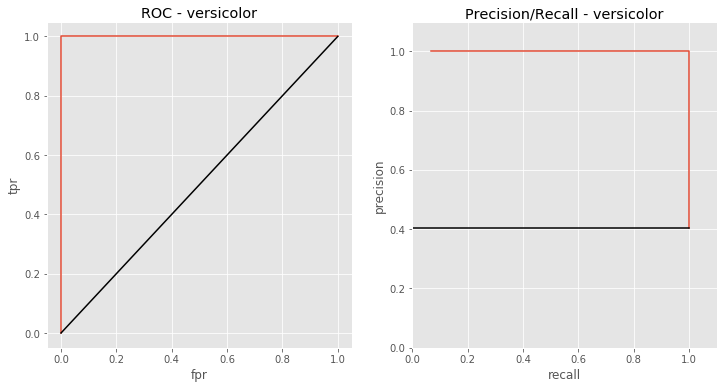

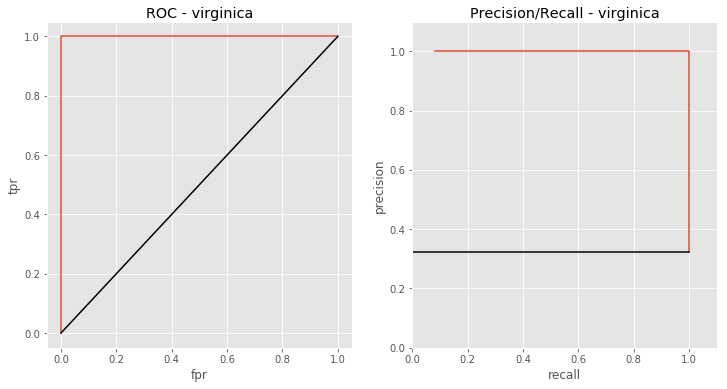

In [20]:
for i in range(num_outputs):
    fig, (ax0, ax1) = plt.subplots(1,2, figsize=(12,6))
    df = c.calculate_threshold_values(i)
    c.plot_roc(ax0, df, i)
    c.plot_precision_recall(ax1, df, i)
    
    
#TODO
"""
Add the wikipedia plot but put the mislabeled points in the color black 

For MNIST: Start small, start easy! 
First project
1) Get the MNIST data 
2) Filter out all but the numbers 9 and 2 
3) Build a 2 v 9 classifier (I strongly recommend only keeping a subset of the training data, you don't need more than a few MBs)
3a) Visualize the layers in your net, ideal while it's training 
3b) Investigate something equivalent to the training stats curve 
3c) Invetsigate using tensorboard while your model is training 
4) Once you have a good 2 v 9 classifier build out a 3 way classifier (0 v 4 v 7) (for this one try not to prefilter the data, instead read from the fukll dataset 
5) Do the full 10 digit classifier 

Links:
http://cs.stanford.edu/people/karpathy/convnetjs/

"""

# 9) Scatter Plots including Misclassified data

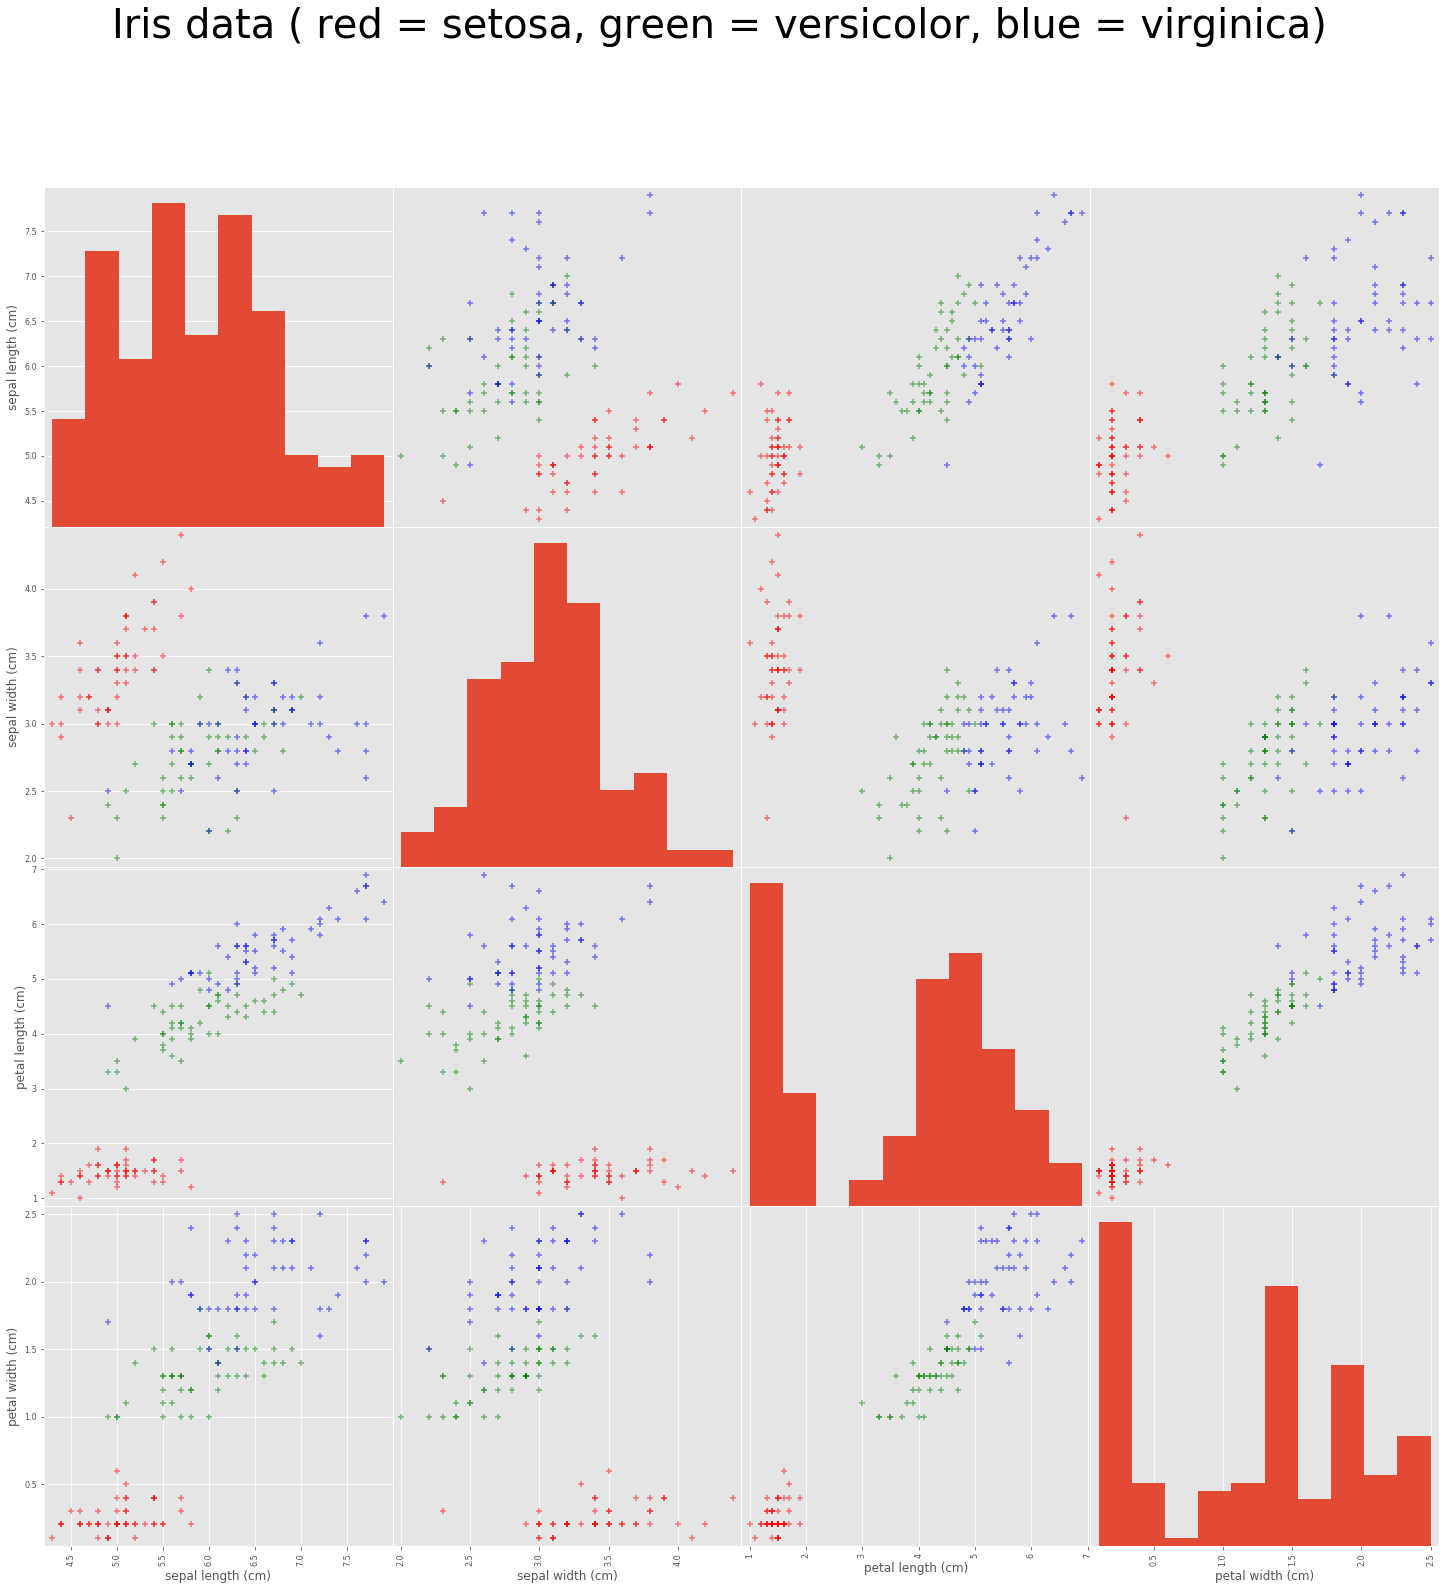

In [70]:
p = Plots(full_df)
p.create_scatter_matrix('species name', 'species','Iris data')

In [ ]:
evaluation = Evaluation(test_df, pred_labels, name_dict)

In [ ]:
fake_labels = np.array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])
len(fake_labels)

In [ ]:
num_fake_correct_predictions = np.sum([fake_labels == y_test])
fake_test_accuracy = num_fake_correct_predictions/float(len(fake_labels))
print("Test Error Accuracy: {:0.3f}".format(fake_test_accuracy))

In [ ]:
fake_e = Evaluation(test_df, fake_labels, name_dict)
fake_misclass = fake_e.add_pred_classification_to_df()
fake_misclass

In [21]:
def add_pred_classification_to_df(df, y_pred):
    # It is stupid we have to specify dtype to limit number of allowed chars in string.
    # Find a way around this
    # pred_labels = np.empty(len(self.y_pred), dtype= '|S13')
    pred_labels = np.empty(len(y_pred), dtype = int)
    misclassified = np.empty(len(y_pred), dtype = bool)
#     for numeric_label in label_name_dict:
#         # pred_labels[np.where(self.y_pred == numeric_label)] = self.label_name_dict[numeric_label]
#         print (len(np.where(y_pred == numeric_label)))
#         pred_labels[np.where(y_pred == numeric_label)] = numeric_label
    y_test = df['species']
    misclassified[np.where(y_test != y_pred)] = True
    print y_pred
    indicator = y_pred
    print y_pred
    # indicator[misclassified] = 'misclassified
    indicator[misclassified] = 3
    print (y_pred == indicator)
    test_df = df
    test_df['predicted'] = y_pred
    test_df['indicator'] = indicator
    return test_df

In [24]:
y_test

array([2, 1, 0, 2, 0, 2, 2, 1, 2, 1, 1, 0, 1, 0, 1, 0, 0, 2, 1, 2, 1, 0, 0,
       1, 2, 1, 2, 1, 1, 1, 2, 0, 1, 2, 0, 1, 0, 2])

In [22]:
pred_labels

array([2, 1, 0, 2, 0, 2, 2, 1, 2, 1, 1, 0, 1, 0, 1, 0, 0, 2, 1, 2, 1, 0, 0,
       1, 1, 1, 2, 1, 1, 1, 2, 0, 1, 2, 0, 1, 0, 2])

In [23]:
df_misclassified = add_pred_classification_to_df(test_df, pred_labels)
df_misclassified

[2 1 0 2 0 2 2 1 2 1 1 0 1 0 1 0 0 2 1 2 1 0 0 1 1 1 2 1 1 1 2 0 1 2 0 1 0
 2]
[2 1 0 2 0 2 2 1 2 1 1 0 1 0 1 0 0 2 1 2 1 0 0 1 1 1 2 1 1 1 2 0 1 2 0 1 0
 2]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species name,predicted,indicator
0,7.9,3.8,6.4,2.0,2,virginica,2,2
1,6.4,2.9,4.3,1.3,1,versicolor,1,1
2,4.8,3.0,1.4,0.1,0,setosa,0,0
3,6.5,3.0,5.8,2.2,2,virginica,2,2
4,4.4,3.0,1.3,0.2,0,setosa,0,0
5,7.2,3.2,6.0,1.8,2,virginica,2,2
6,6.4,2.7,5.3,1.9,2,virginica,2,2
7,5.5,2.4,3.8,1.1,1,versicolor,1,1
8,6.9,3.2,5.7,2.3,2,virginica,2,2
9,6.7,3.0,5.0,1.7,1,versicolor,1,1


In [ ]:
p2 = Plots(df_misclassified)

In [ ]:
p2.create_scatter_matrix('indicator', 'predicted', 'Iris Test Data Predictions')

In [ ]:
y_test

In [ ]:
    def make_classification_df(y, y_pred, label_name_dict):
        # It is stupid we have to specify dtype to limit number of allowed chars in string.
        # Find a way around this 
        pred_labels = np.empty(len(y_pred), dtype= '|S13')
        misclassified = np.empty(len(y_pred), dtype = bool)
        for numeric_label in label_name_dict:
            pred_labels[np.where(y_pred == numeric_label)] = label_name_dict[numeric_label]
        misclassified[np.where(y != y_pred)] = True
        indicator = pred_labels
        indicator[misclassified] = 'misclassified'
        df = pd.DataFrame({'Actual': y, 'Predicted': y_pred, 'Indicator': indicator})
        return df


In [ ]:
df = make_classification_df(y_test, pred_labels, {0: 'setosa', 1: 'versicolor', 2: 'verginica'})

In [ ]:
df

In [ ]:
classification_df = Dataframe.make_classification_df(y_test, pred_labels, {0: 'setosa', 1: 'versicolor', 2: 'verginica'})

In [ ]:
p2 = Plots(classification_df)

In [ ]:
p2.create_scatter_matrix(class_col_name='Indicator', class_col_name_numeric='Predicted', title= 'Iris Test Predictions')

In [ ]:
X_test

In [ ]:
iris.target_names

In [ ]:
man_iris = Manipulation(iris)

In [ ]:
man_iris.make_label_name_dict()

In [26]:
def factor_scatter_matrix(df, factor, palette=None):
    '''Create a scatter matrix of the variables in df, with differently colored
    points depending on the value of df[factor].
    inputs:
        df: pandas.DataFrame containing the columns to be plotted, as well 
            as factor.
        factor: string or pandas.Series. The column indicating which group 
            each row belongs to.
        palette: A list of hex codes, at least as long as the number of groups.
            If omitted, a predefined palette will be used, but it only includes
            9 groups.
    '''
    import matplotlib.colors
    import numpy as np
    from pandas.tools.plotting import scatter_matrix
    from scipy.stats import gaussian_kde

    if isinstance(factor, basestring):
        factor_name = factor #save off the name
        factor = df[factor] #extract column
        df = df.drop(factor_name,axis=1) # remove from df, so it 
        # doesn't get a row and col in the plot.

    classes = list(set(factor))

    if palette is None:
        palette = ['#e41a1c', '#377eb8', '#4eae4b', 
                   '#994fa1', '#ff8101', '#fdfc33', 
                   '#a8572c', '#f482be', '#999999']

    color_map = dict(zip(classes,palette))

    if len(classes) > len(palette):
        raise ValueError('''Too many groups for the number of colors provided.
We only have {} colors in the palette, but you have {}
groups.'''.format(len(palette), len(classes)))

    colors = factor.apply(lambda group: color_map[group])
    axarr = scatter_matrix(df,figsize=(10,10),marker='o',c=colors,diagonal=None)


    for rc in xrange(len(df.columns)):
        for group in classes:
            y = df[factor == group].icol(rc).values
            gkde = gaussian_kde(y)
            ind = np.linspace(y.min(), y.max(), 1000)
            axarr[rc][rc].plot(ind, gkde.evaluate(ind),c=color_map[group])

    return axarr, color_map

In [31]:
import matplotlib.colors
import numpy as np
from pandas.tools.plotting import scatter_matrix
from scipy.stats import gaussian_kde

In [55]:
factor = 'species'
df = test_df

In [79]:
test_df.drop('indicator', axis= 1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species name,predicted
0,7.9,3.8,6.4,2.0,2,virginica,2
1,6.4,2.9,4.3,1.3,1,versicolor,1
2,4.8,3.0,1.4,0.1,0,setosa,0
3,6.5,3.0,5.8,2.2,2,virginica,2
4,4.4,3.0,1.3,0.2,0,setosa,0
5,7.2,3.2,6.0,1.8,2,virginica,2
6,6.4,2.7,5.3,1.9,2,virginica,2
7,5.5,2.4,3.8,1.1,1,versicolor,1
8,6.9,3.2,5.7,2.3,2,virginica,2
9,6.7,3.0,5.0,1.7,1,versicolor,1


In [57]:
if isinstance(factor, basestring):
    factor_name = factor #save off the name
    factor = df[factor] #extract column
    df = df.drop(factor_name,axis=1) # remove from df, so it 
    # doesn't get a row and col in the plot.


In [56]:
isinstance(factor, basestring)

True

In [58]:
factor

0     2
1     1
2     0
3     2
4     0
5     2
6     2
7     1
8     2
9     1
10    1
11    0
12    1
13    0
14    1
15    0
16    0
17    2
18    1
19    2
20    1
21    0
22    0
23    1
24    2
25    1
26    2
27    1
28    1
29    1
30    2
31    0
32    1
33    2
34    0
35    1
36    0
37    2
Name: species, dtype: int64

In [59]:
classes = list(set(factor))
classes

[0, 1, 2]

In [54]:
isinstance('Hello', basestring)

True

In [61]:
palette = ['#e41a1c', '#377eb8', '#4eae4b', 
           '#994fa1', '#ff8101', '#fdfc33', 
           '#a8572c', '#f482be', '#999999']

In [62]:
color_map = dict(zip(classes,palette))

In [69]:
color_map.items()

[(0, '#e41a1c'), (1, '#377eb8'), (2, '#4eae4b')]

In [73]:
colors = factor.apply(lambda group: color_map[group])
colors[11] = palette[4]
type(colors)

pandas.core.series.Series